# Introduction

The analysis investigates the prevalence and contributing factors to depression among students using a dataset that captures demographic, academic, and lifestyle variables. The study aims to identify key relationships between features such as academic pressure, sleep duration, dietary habits, and depression levels. This EDA provides insights into patterns, distributions, and potential factors associated with student mental health challenges.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_student=pd.read_csv('Student_Depression_Dataset.csv')

In [38]:
df_student.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [39]:
df_student.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [40]:
print('Dataset Shape :', df_student.shape)
print('Missing Data :', df_student.isna().sum().sum())
print('Duplicated Data :', df_student.duplicated().sum())

Dataset Shape : (27901, 18)
Missing Data : 3
Duplicated Data : 0


In [41]:
df_student.info() # Checking non-null value counts and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [42]:
# Unique values count
df_student.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [43]:
# Count of missing values
missing = df_student.isnull().sum()
missing

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [44]:
# Percentage of missing values
per =  (missing / len(df_student)) * 100
per

id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

In [45]:
# Dropping unnecessary column
df_student = df_student.drop(columns=['id'])
df_student.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


# Dataset Overview

- **Shape:** The dataset comprises 27,901 rows and 18 columns.
- **Missing Data:** Only three missing values were identified, representing 0.01% of the `Financial Stress` column.
- **Duplicates:** No duplicate rows were detected.
- **Data Types:** The dataset contains numerical and categorical variables suitable for statistical and visual analysis.

# Univariate Analysis: Numeric Features Distribution

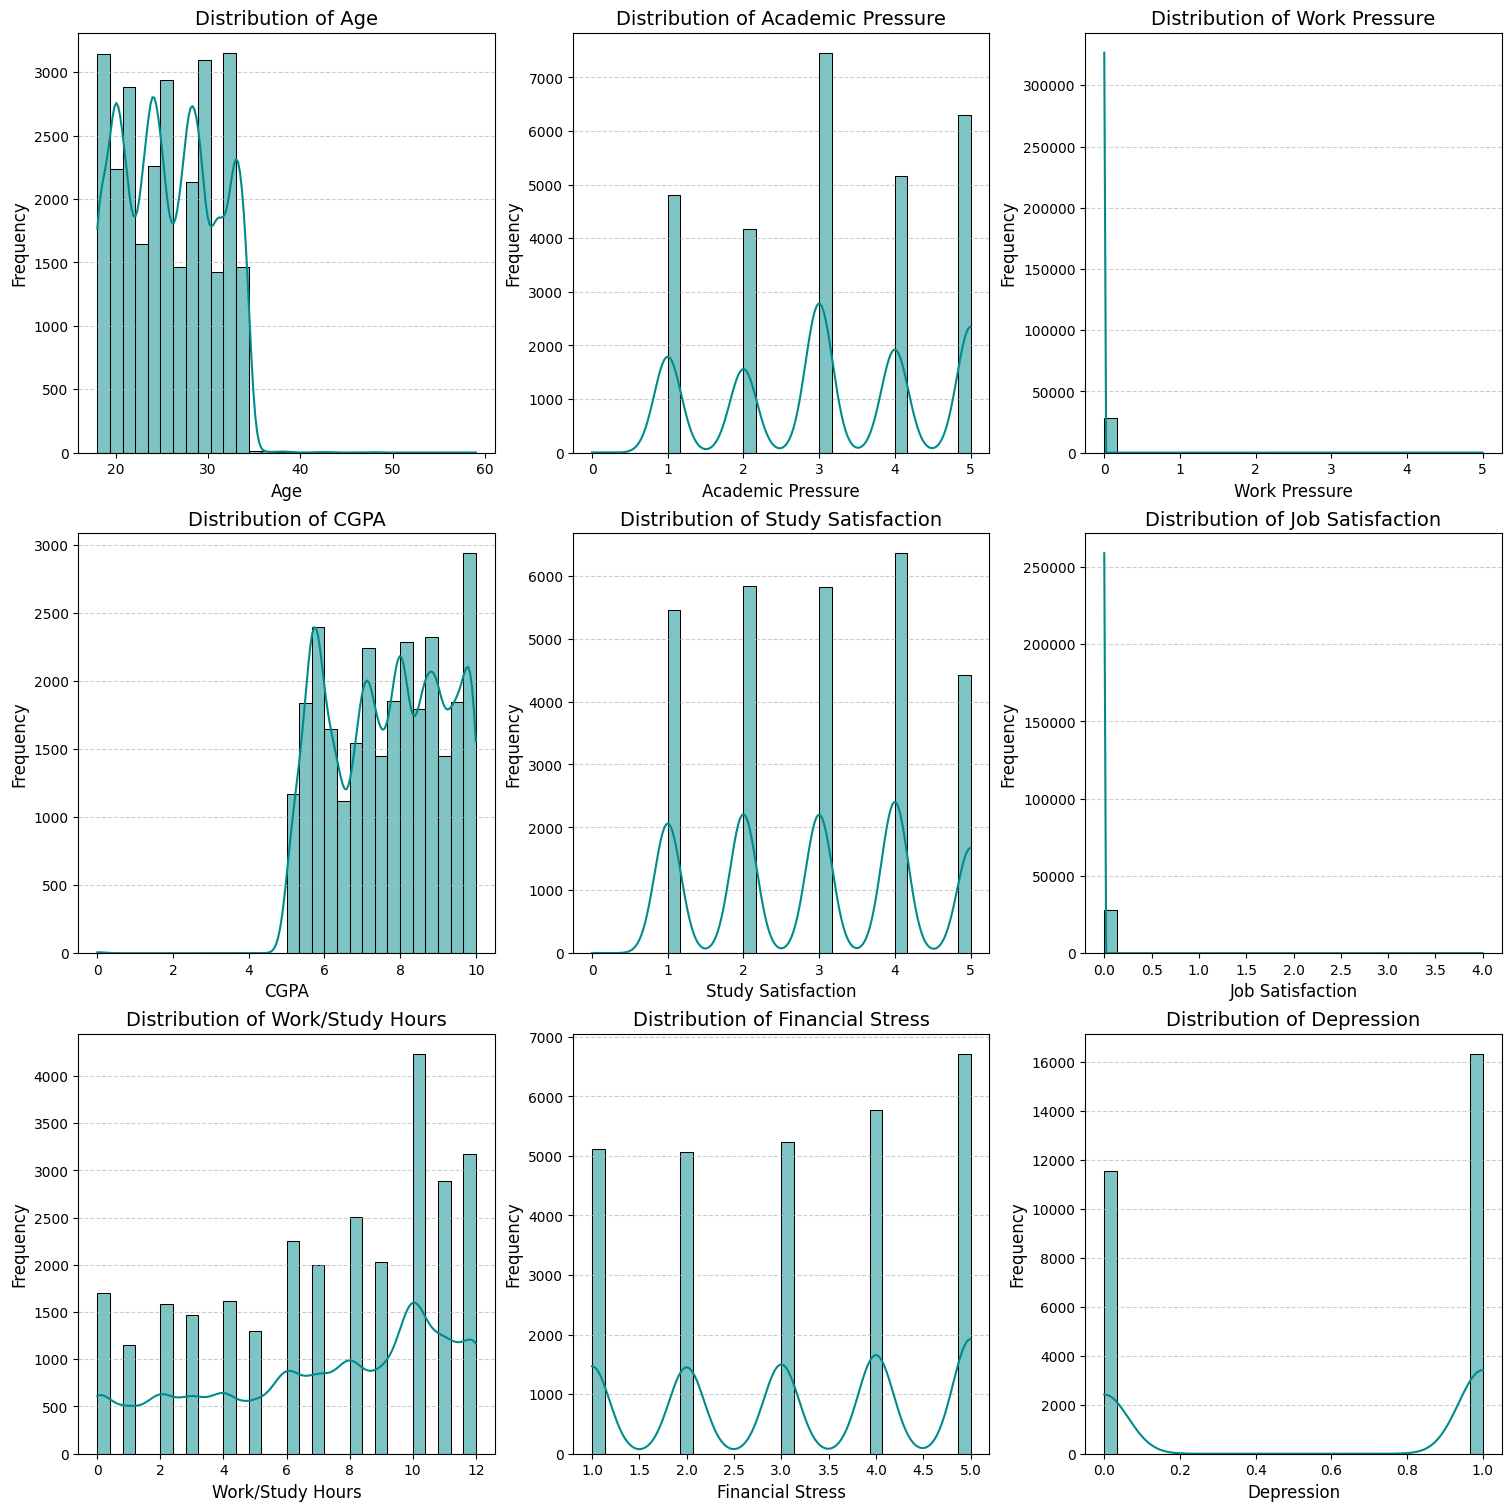

In [46]:
numerical_columns = df_student.select_dtypes(include=['number']).columns #Selecting Numerical Columns

#Grid Configuration
num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

#Creating Subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

#Plotting Each Numerical Column
for i, j in enumerate(numerical_columns):
    sns.histplot(df_student[j], kde=True, bins=30,  color='darkcyan', ax=axes[i])
    axes[i].set_title(f"Distribution of {j}", fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

#Removing Unused Axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Univariate Analysis: Categorical Features Distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17596\2870923122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, y=j, order=df_student[j].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17596\2870923122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, y=j, order=df_student[j].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17596\2870923122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_stud

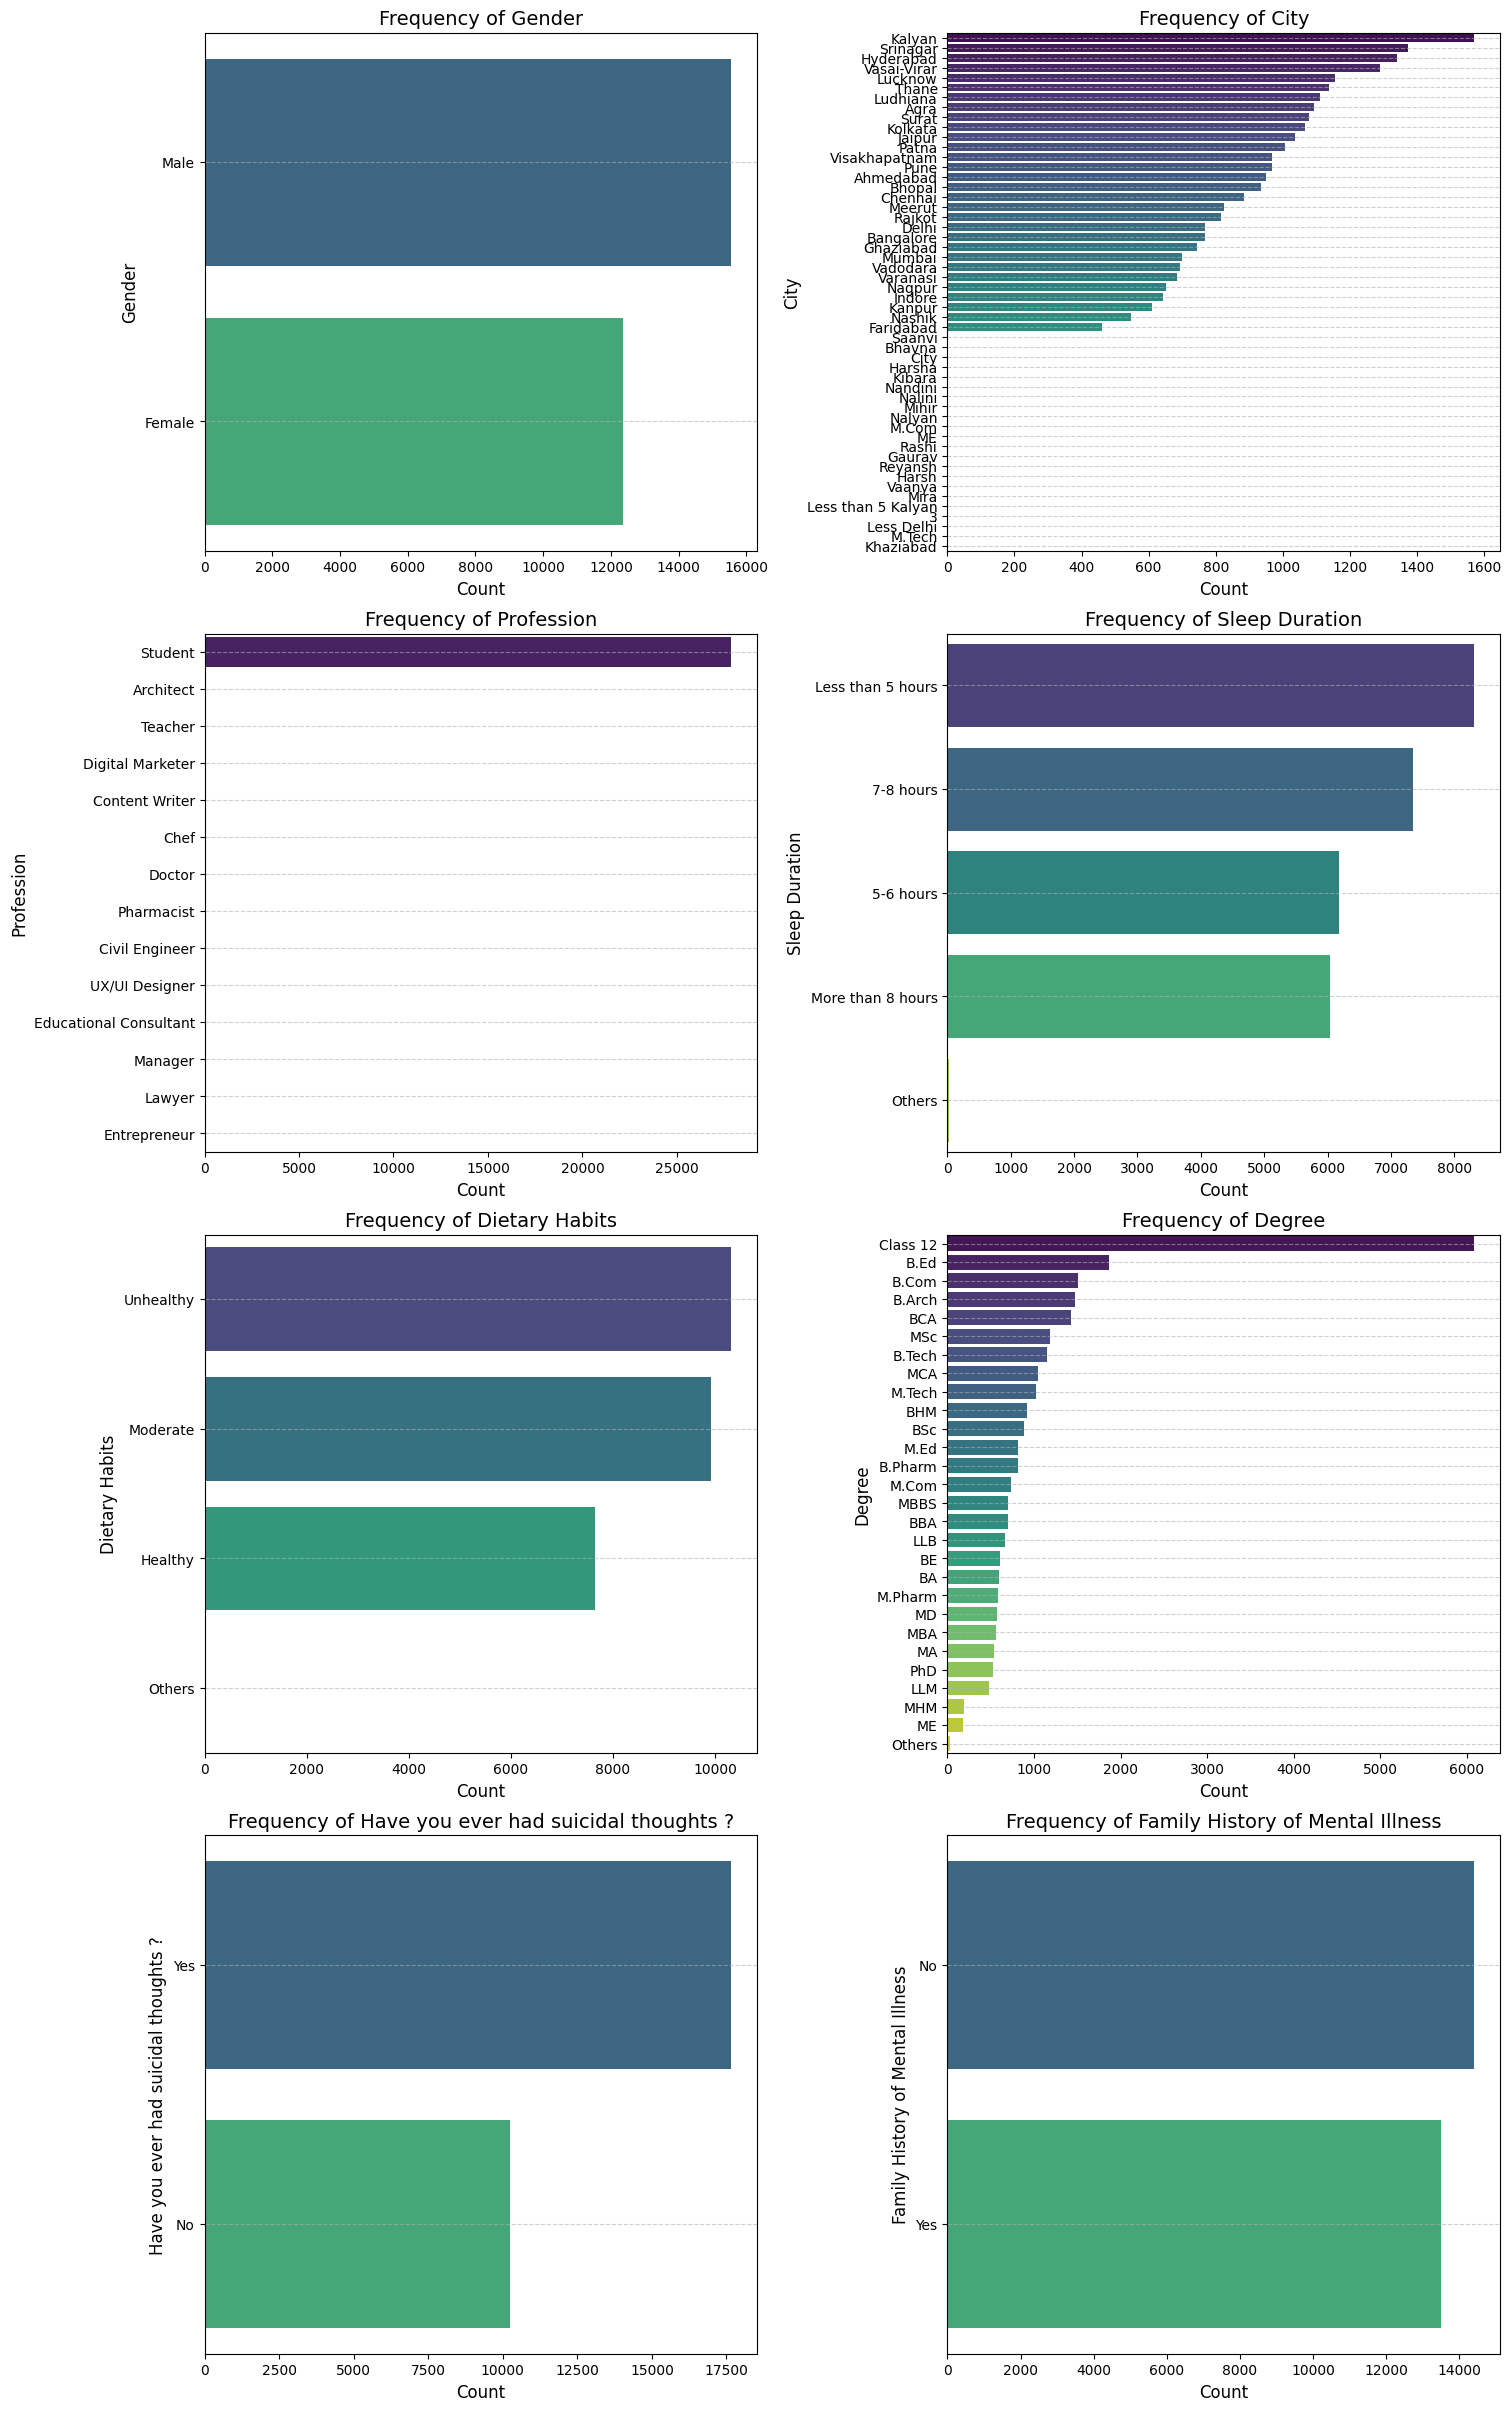

In [47]:
categorical_columns = df_student.select_dtypes(include=['object']).columns # Selecting Categorical Columns

# Grid Configuration
num_cols = len(categorical_columns)
cols = 2
rows = (num_cols + cols - 1) // cols

#Creating Subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6), constrained_layout=True)
axes = axes.flatten()

#Plotting Each Categorical Column
for i, j in enumerate(categorical_columns):
    sns.countplot(data=df_student, y=j, order=df_student[j].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Frequency of {j}", fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel(j, fontsize=12)

#Removing Unused Axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- **Numeric Features:** Distributions of variables such as `Age`, `Academic Pressure`, and `CGPA` were examined using histograms. Most distributions appeared symmetrical, though some showed variations in range and outliers.
- **Categorical Features:** Variables like `Gender`, `City`, and `Dietary Habits` were explored using count plots. Certain categories dominated the distribution, indicating trends in the dataset.

# Outlier Detection

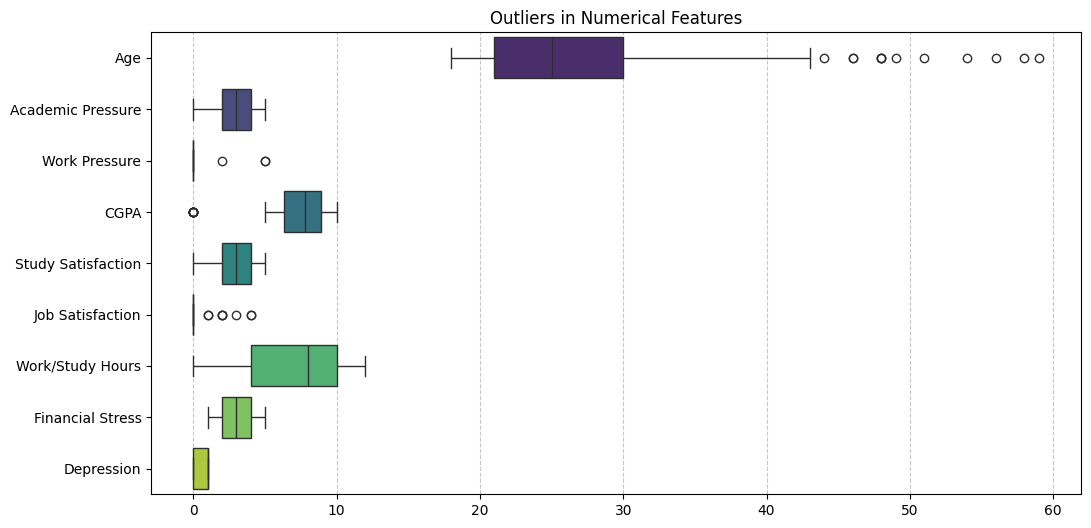

In [48]:
plt.figure(figsize=(12, 6)) # Figure Setup
sns.boxplot(data=df_student[numerical_columns], orient='h', palette='viridis') # Box Plot

plt.title('Outliers in Numerical Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

- Box plots were utilized to identify outliers in numerical columns such as `Work Pressure` and `Financial Stress`. A few extreme values were detected, which might influence statistical modeling.

# Correlation Analysis

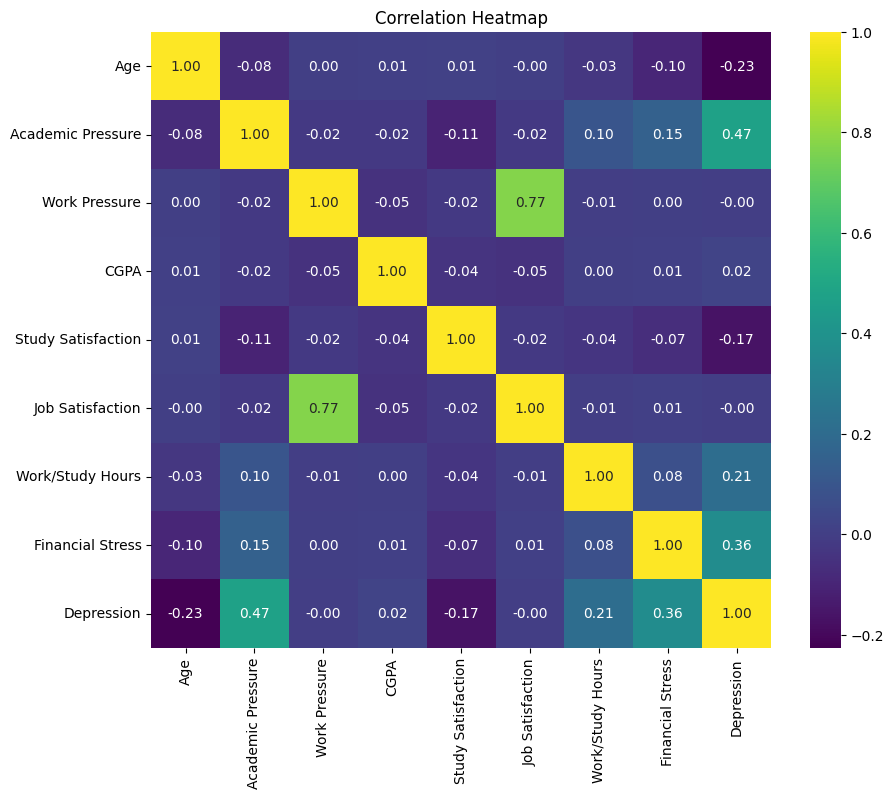

In [49]:
numeric_df = df_student.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

- A heatmap revealed significant correlations among numerical variables. Academic pressure showed moderate correlations with `Financial Stress` and `Study Satisfaction`.


# Bivariate Analysis: Numerical Feature Distribution

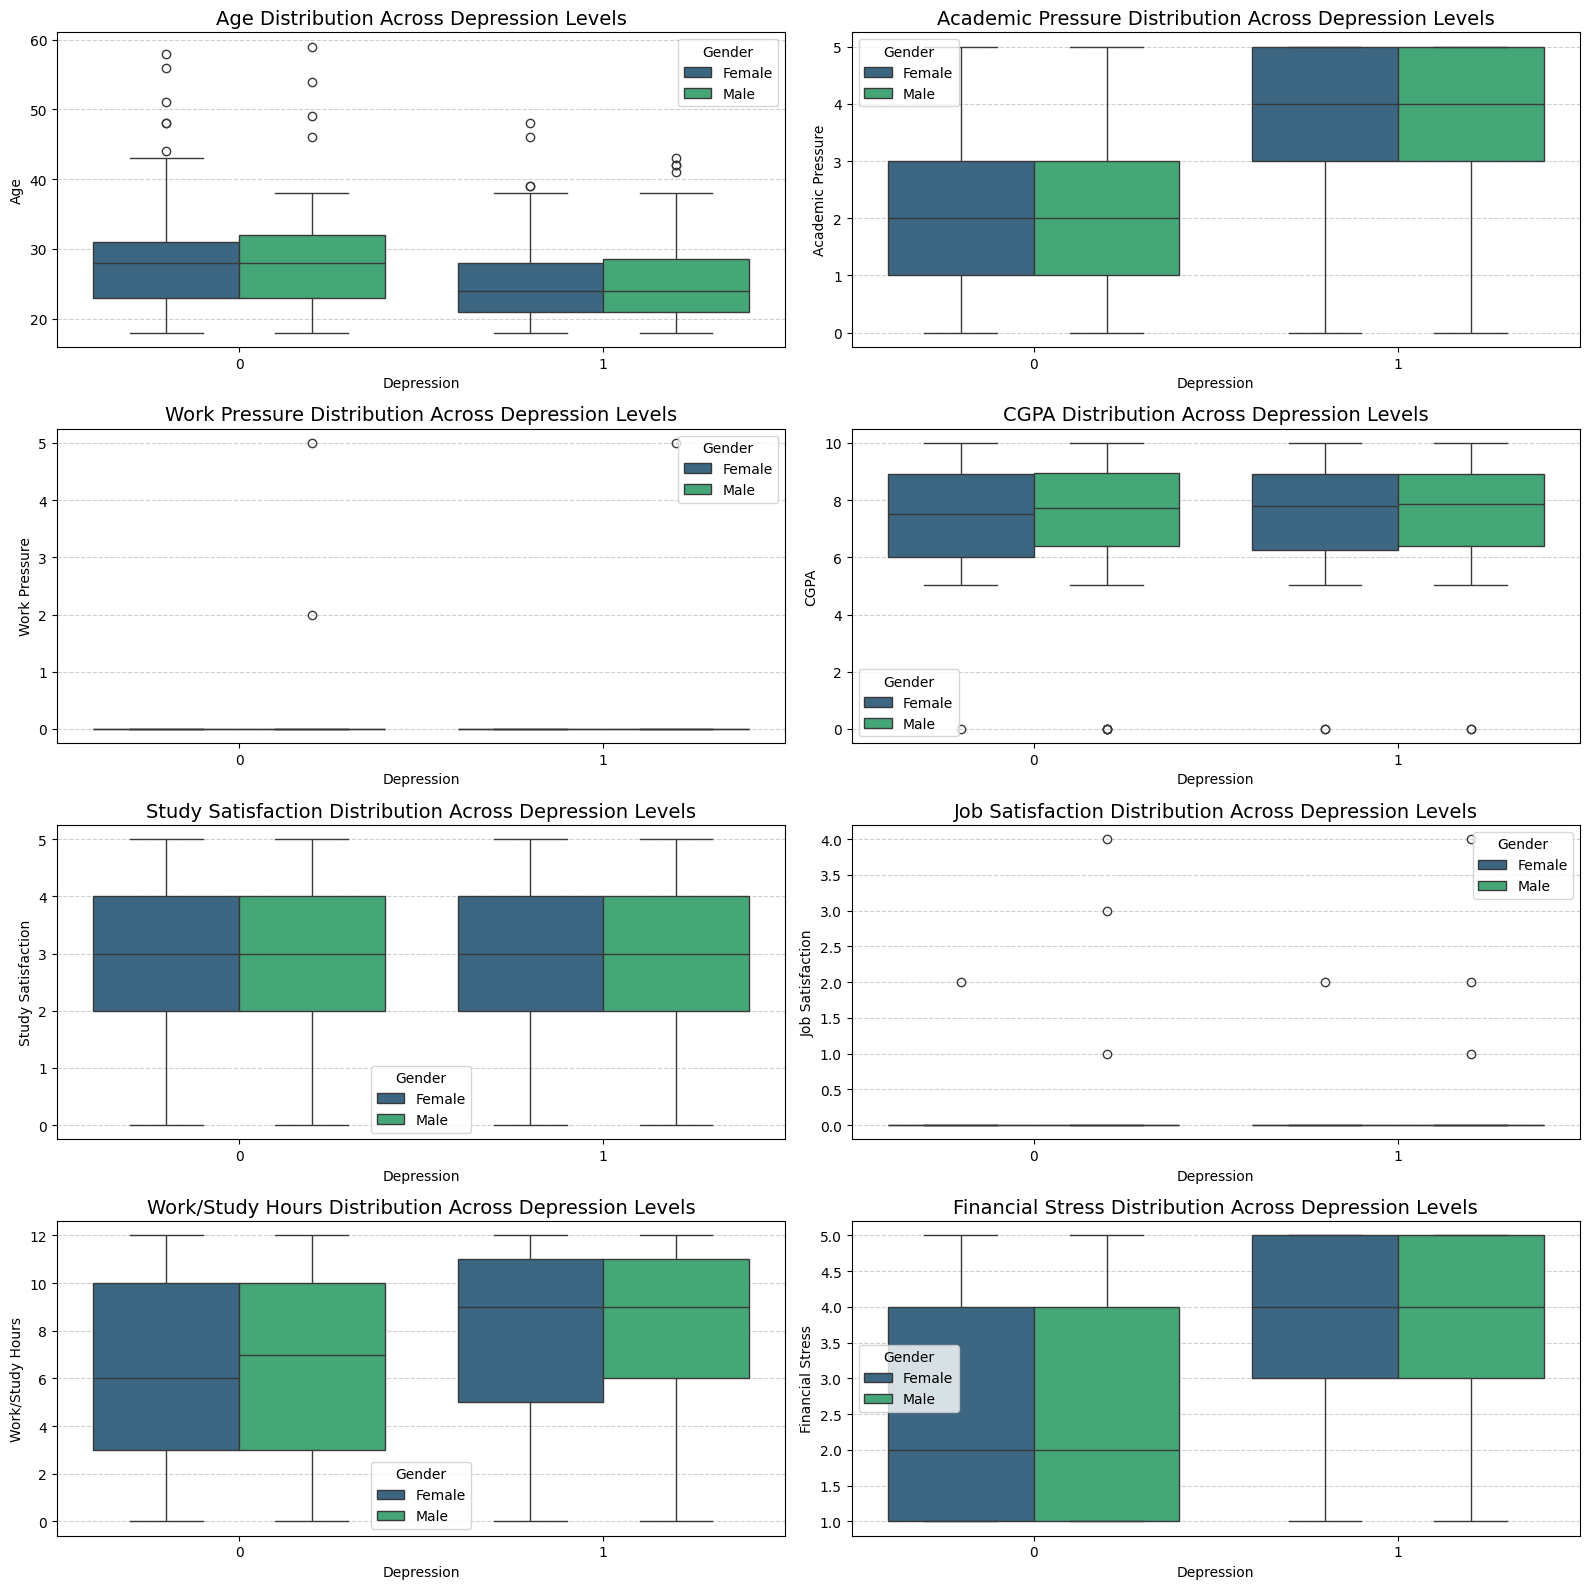

In [50]:
n_cols = 2
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16)) 
axes = axes.flatten()

for i, j in enumerate([col for col in numerical_columns if col != 'Depression']):
    sns.boxplot(x='Depression', y=j, data=df_student, hue='Gender', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel('Depression')
    axes[i].set_ylabel(j)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Bivariate Analysis: Categorical Feature Distribution

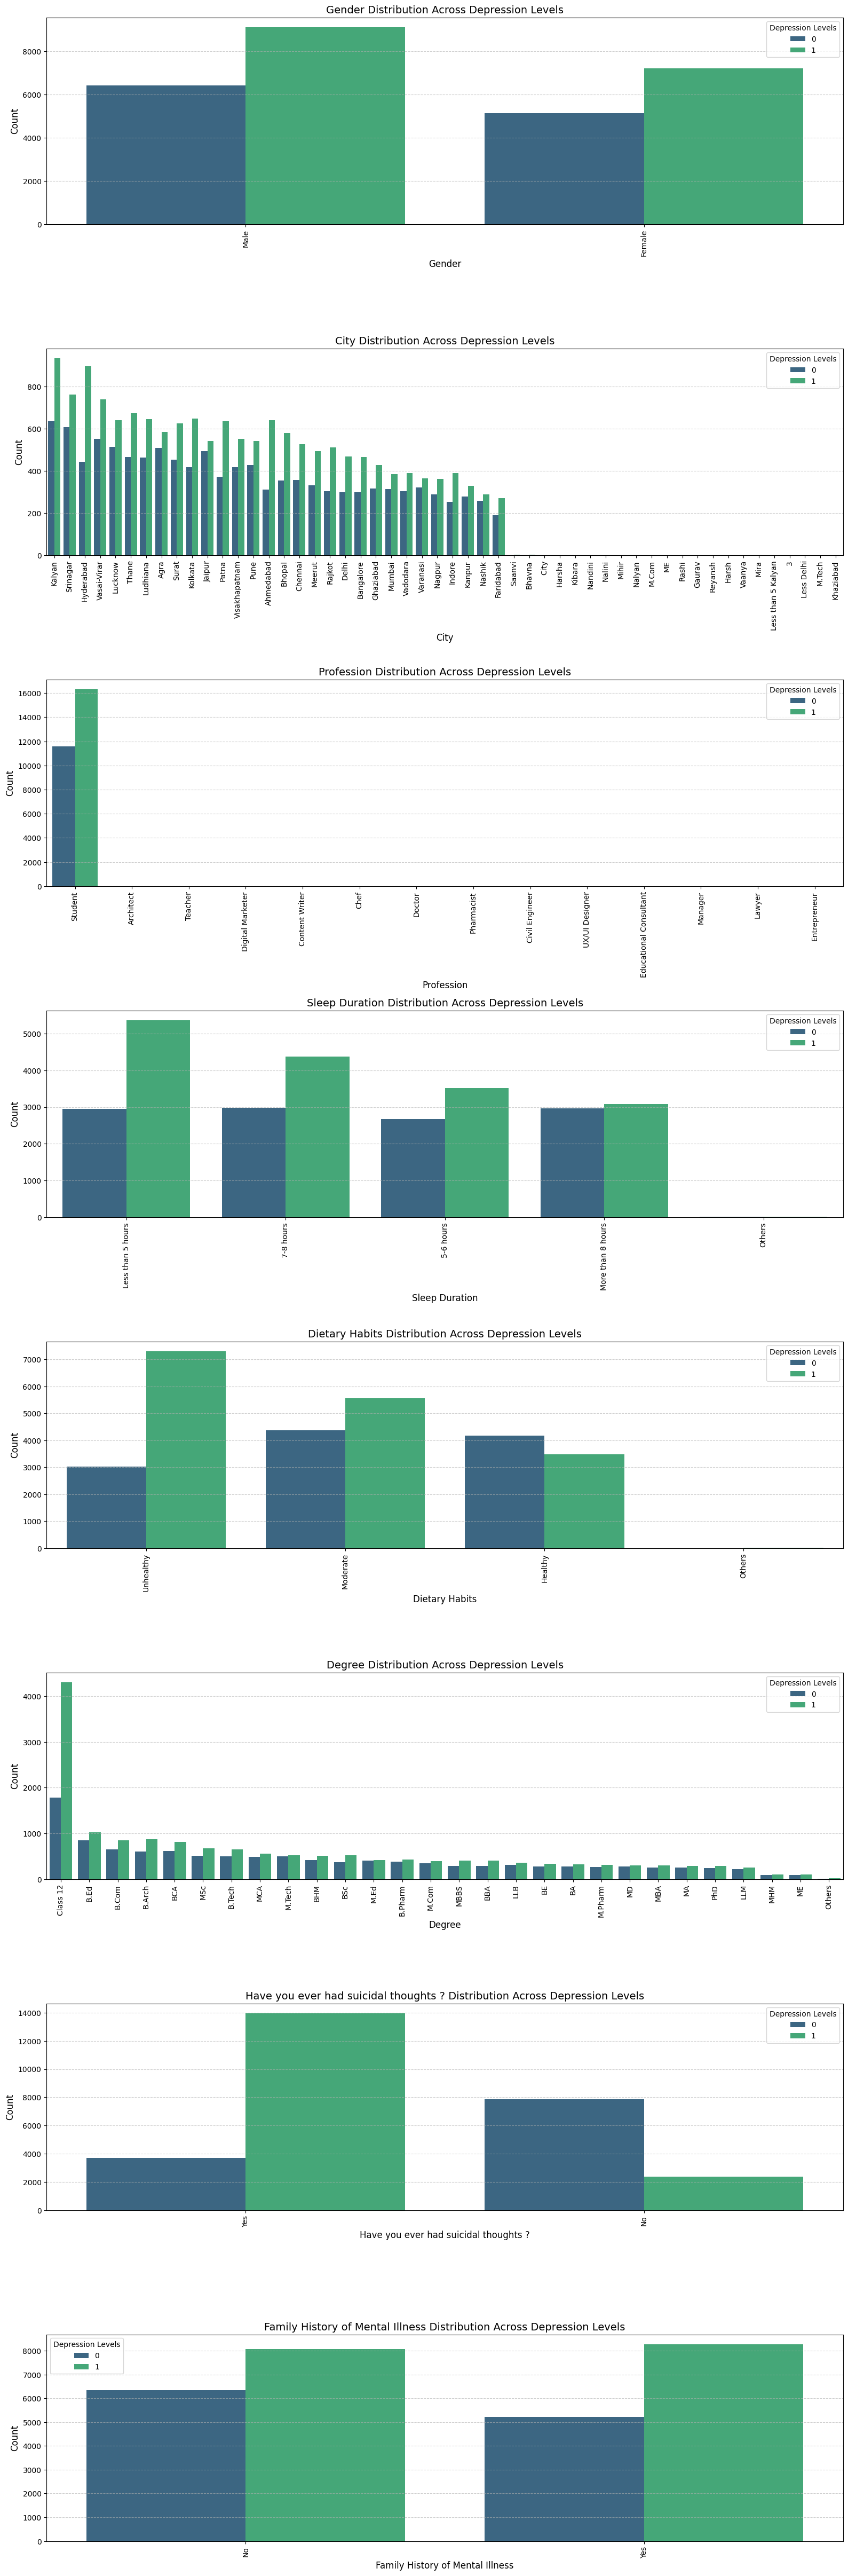

In [51]:
n_cols = 1
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()

for i, j in enumerate(categorical_columns):
    sns.countplot(data=df_student, x=j, hue='Depression', palette='viridis', order=df_student[j].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].legend(title='Depression Levels', fontsize=10)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Examined how depression levels varied across demographic and lifestyle factors.
- Boxplots indicated gender-based differences in depression levels related to `Academic Pressure` and `Work/Study Hours`.
- Count plots explored categorical features like `Degree` and `City` across depression levels.

# Pairwise Analysis

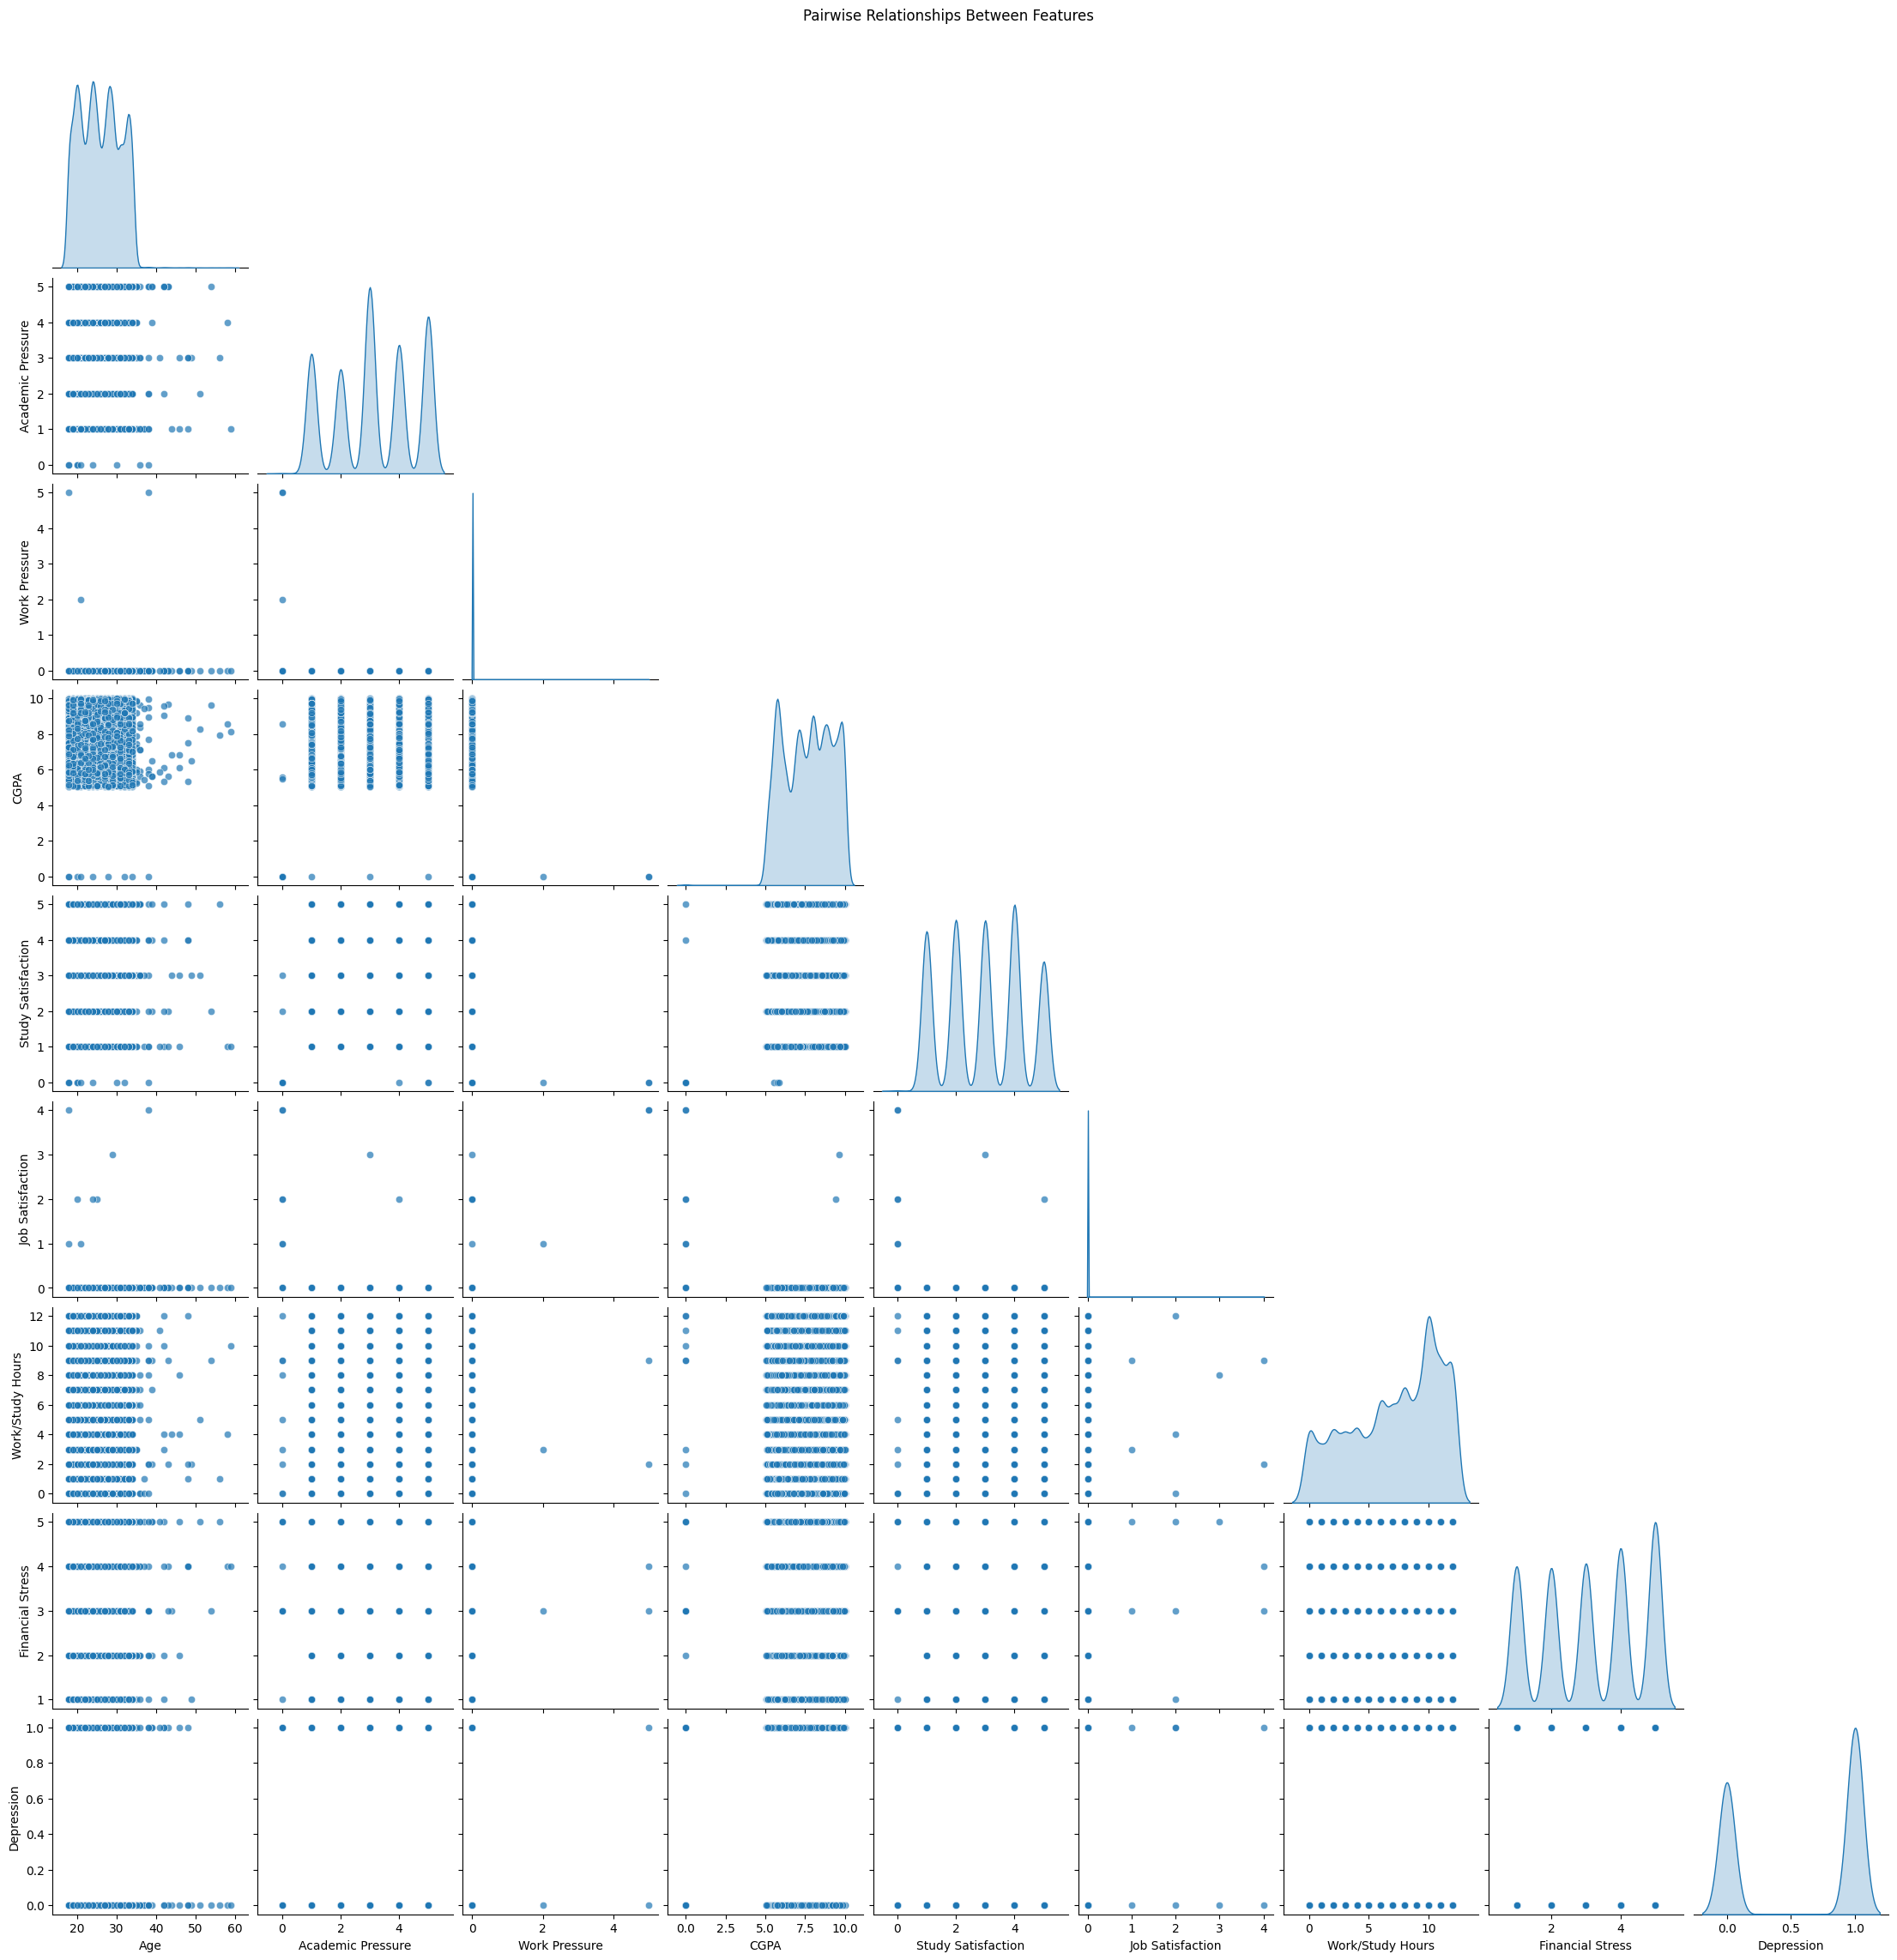

In [52]:
sns.pairplot(df_student[numerical_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

- A pairplot demonstrated relationships among numerical features, highlighting clusters and patterns.

# Grouped Aggregations

In [53]:
# Gender level
gender = df_student.groupby('Gender')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
gender

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Gender,,,,,,,,,
Male,25.861967,3.113848,0.000772,7.703352,2.924680,0.000965,7.199974,3.132832,0.586287
Female,25.772381,3.175652,0.000000,7.596645,2.967946,0.000324,7.102882,3.148721,0.584507


In [54]:
# Suicidal thoughts level
suicide = df_student.groupby('Have you ever had suicidal thoughts ?')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
suicide

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Have you ever had suicidal thoughts ?,,,,,,,,,
Yes,25.398165,3.416402,0.000396,7.66564,2.857272,0.000566,7.499604,3.368826,0.790496
No,26.553245,2.666959,0.000488,7.63967,3.093021,0.000878,6.566520,2.745167,0.232211


- Aggregated statistics showed higher academic pressure and financial stress among those who reported suicidal thoughts compared to those who did not.

---

# **Interpretation**
## **Prevalence of Depression**
- Approximately 58.5% of students exhibited signs of depression based on the binary classification in the dataset.

## **Key Observations**
- Students with high academic and financial stress had higher depression levels.
- Sleep duration and dietary habits correlated with depression, with "healthy" habits associated with lower depression rates.
- Gender disparities emerged in study satisfaction and stress levels, although depression levels were comparable.

## **Outliers and Anomalies**
- While outliers were minimal, they occurred in financial stress and work pressure, likely due to varying personal circumstances.

## **Correlations**
- Academic performance (CGPA) did not have a direct link with depression levels, suggesting external factors played a larger role.


---


# **Conclusion**
This EDA highlights the multifaceted nature of student mental health. The findings emphasize the importance of addressing academic and financial stress and promoting healthy lifestyle choices to improve student well-being. Further research and predictive modeling can build on these insights to develop targeted interventions and support mechanisms.